In [1]:
import os
os.chdir('..')
import warnings
warnings.filterwarnings('ignore')


# Forecasting future sales for Rossmann Pharmaceuticals across various stores

## Using machine learning and deep learning techniques

#### Load train, test and store dataset for EDA analysis

In [2]:
train_data_path = 'docs/train.csv'
test_data_path ='docs/test.csv'
store_data_path ='docs/store.csv'


In [3]:
from scripts.data_loder import load_data


In [4]:
train_data, test_data, store_data = load_data(train_data_path,test_data_path,store_data_path)


### Verify the loaded datasets

#### Train Dataset

In [5]:
train_data.head(10)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1
6,7,5,2015-07-31,15344,1414,1,1,0,1
7,8,5,2015-07-31,8492,833,1,1,0,1
8,9,5,2015-07-31,8565,687,1,1,0,1
9,10,5,2015-07-31,7185,681,1,1,0,1


#### Test Dataset

In [6]:
test_data.head(10)


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
5,6,10,4,2015-09-17,1.0,1,0,0
6,7,11,4,2015-09-17,1.0,1,0,0
7,8,12,4,2015-09-17,1.0,1,0,0
8,9,13,4,2015-09-17,1.0,1,0,0
9,10,14,4,2015-09-17,1.0,1,0,0


#### Store Dataset

In [7]:
store_data.head(10)


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


## Exploratory Data Analysis (EDA)

#### Check missing value

In [8]:
from scripts.preprocessing import find_missing_values


#### Find missing values of Train Dataset

In [9]:
find_missing_values(train_data)


From 9 columns selected, there are 0 columns with missing values.


,Missing values,Percent of Total Values,DataType


#### Find Missing Values of Test Dataset

In [10]:
find_missing_values(test_data)


From 8 columns selected, there are 1 columns with missing values.


,Missing values,Percent of Total Values,DataType
Open,11,0.0,float64


#### Find missing values of Store Dataset

In [11]:
find_missing_values(store_data)


From 10 columns selected, there are 6 columns with missing values.


,Missing values,Percent of Total Values,DataType
Promo2SinceWeek,544,48.8,float64
Promo2SinceYear,544,48.8,float64
PromoInterval,544,48.8,object
CompetitionOpenSinceMonth,354,31.7,float64
CompetitionOpenSinceYear,354,31.7,float64
CompetitionDistance,3,0.3,float64


### Check Outlier

In [12]:
from scripts.preprocessing import get_outlier_summary


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns


#### Detect outlier for train_data

In [14]:
get_outlier_summary(train_data)


From 7 selected numerical columns, there are 4 columns with outlier values.


,Variable,Number of Outliers
0,Store,0
1,DayOfWeek,0
2,Sales,26694
3,Customers,38095
4,Open,172817
5,Promo,0
6,SchoolHoliday,181721


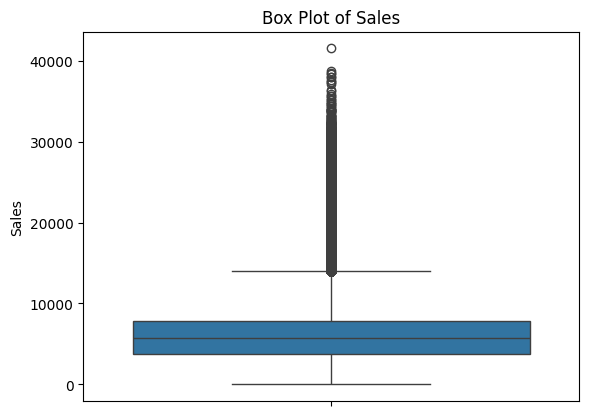

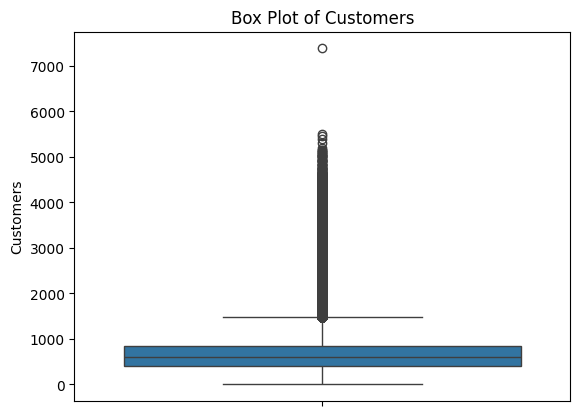

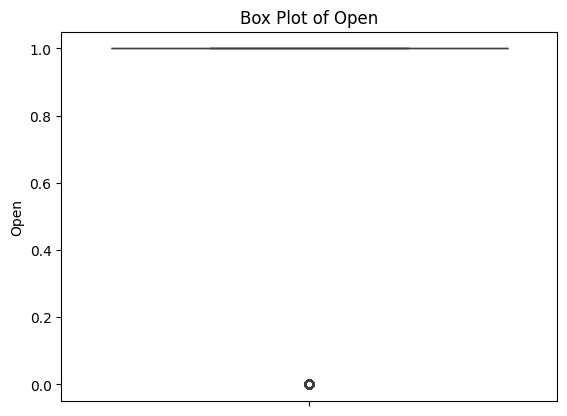

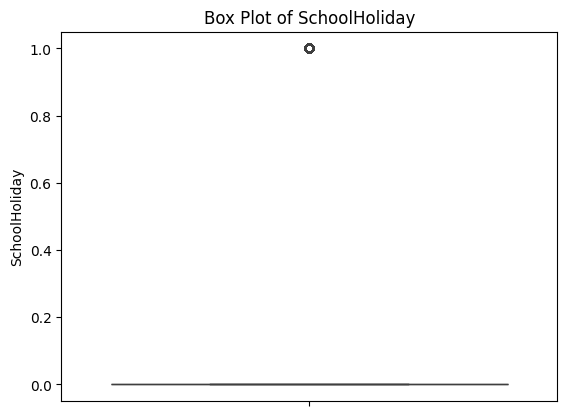

In [21]:
for column in train_data[['Sales','Customers','Open','SchoolHoliday']]:
    sns.boxplot(data=train_data[column])
    plt.title(f"Box Plot of {column}")
    plt.show()


#### Detect outlier for Test Data

In [16]:
get_outlier_summary(test_data)


From 6 selected numerical columns, there are 1 columns with outlier values.


,Variable,Number of Outliers
0,Id,0
1,Store,0
2,DayOfWeek,0
3,Open,5984
4,Promo,0
5,SchoolHoliday,0


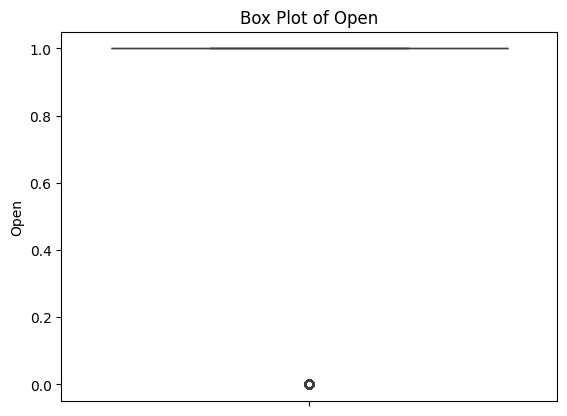

In [24]:
sns.boxplot(data=test_data['Open'])
plt.title("Box Plot of Open")
plt.show()


#### Detect outlier for Store data

In [17]:
get_outlier_summary(store_data)


From 7 selected numerical columns, there are 2 columns with outlier values.


,Variable,Number of Outliers
0,Store,0
1,CompetitionDistance,108
2,CompetitionOpenSinceMonth,0
3,CompetitionOpenSinceYear,11
4,Promo2,0
5,Promo2SinceWeek,0
6,Promo2SinceYear,0


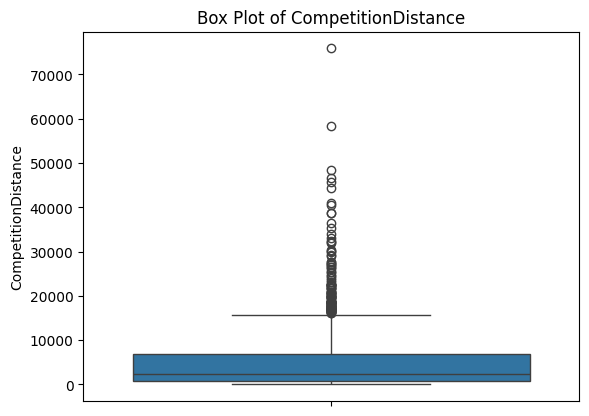

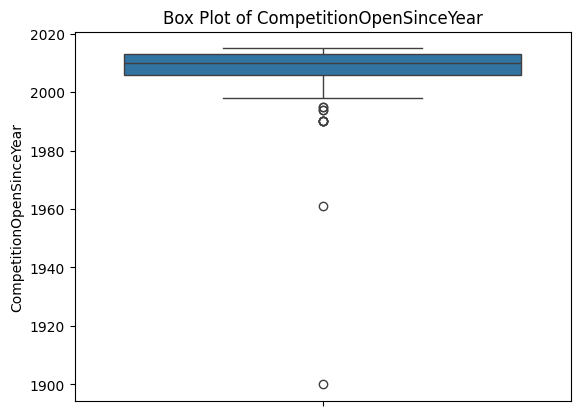

In [26]:
for column in store_data[['CompetitionDistance','CompetitionOpenSinceYear']]:
    sns.boxplot(data=store_data[column])
    plt.title(f"Box Plot of {column}")
    plt.show()
